## DFO Nutrient Comparison

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import netCDF4 as nc
import datetime as dt
from salishsea_tools import evaltools as et, viz_tools, geo_tools
import gsw
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import matplotlib.dates as mdates
import cmocean as cmo
import scipy.interpolate as sinterp
import pytz
import pickle
import cmocean
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

In [2]:
PATH= '/data/eolson/results/MEOPAR/SS36runs/linkHC201812/'
start_date = dt.datetime(2015,1,1)
end_date = dt.datetime(2018,1,1)
flen=1
namfmt='nowcast'
#varmap={'N':'nitrate','Si':'silicon','Ammonium':'ammonium'}
filemap={'nitrate':'ptrc_T','silicon':'ptrc_T','ammonium':'ptrc_T','diatoms':'ptrc_T','ciliates':'ptrc_T','flagellates':'ptrc_T','vosaline':'grid_T','votemper':'grid_T'}
#gridmap={'nitrate':'tmask','silicon':'tmask','ammonium':'tmask'}
fdict={'ptrc_T':1,'grid_T':1}
rematch=False
rematch2=False
if rematch==True:
    df1=et.loadDFO()
    df1.head()

In [3]:
if rematch==True:
    data=et.matchData(df1,filemap, fdict, start_date, end_date, namfmt, PATH, flen)
    pickle.dump(data,open('/data/eolson/MEOPAR/SS36runs/calcFiles/evalMatches/dataDFO.pkl','wb'))
elif rematch2==True:
    data=pickle.load(open('/data/eolson/MEOPAR/SS36runs/calcFiles/evalMatches/dataDFO.pkl','rb'))

In [4]:
if rematch2==True:
    # get rid of points with no nitrate data
    data=data.loc[data.N>=0].reindex()
    # acquire model SSH, velocities for these data:
    data=et.matchData(data,{'vomecrty':'grid_V'},{'grid_V':1},start_date,end_date,
                  namfmt,PATH,flen,maskName='vmask')
    data=et.matchData(data,{'vozocrtx':'grid_U'},{'grid_U':1},start_date,end_date,
                  namfmt,PATH,flen,maskName='umask')
    data=et.matchData(data,{'sossheig':'grid_T'},{'grid_T':1},start_date,end_date,
                  namfmt,PATH,flen,maskName='tmask',sdim=2)
    pickle.dump(data,open('/data/eolson/MEOPAR/SS36runs/calcFiles/evalMatches/dataDFOwithUVSSH.pkl','wb'))
else:
    data=pickle.load(open('/data/eolson/MEOPAR/SS36runs/calcFiles/evalMatches/dataDFOwithUVSSH.pkl','rb'))

In [5]:
data=pickle.load(open('/data/eolson/MEOPAR/SS36runs/calcFiles/evalMatches/dataDFOwithUVSSH.pkl','rb'))

In [6]:
data.keys()

Index(['Year', 'Month', 'Day', 'Hour', 'Lat', 'Lon', 'Pressure', 'Depth',
       'Ammonium', 'Ammonium_units', 'Chlorophyll_Extracted',
       'Chlorophyll_Extracted_units', 'N', 'Si', 'Silicate_units', 'AbsSal',
       'ConsT', 'Z', 'dtUTC', 'j', 'i', 'mod_nitrate', 'mod_silicon',
       'mod_ammonium', 'mod_diatoms', 'mod_ciliates', 'mod_flagellates',
       'mod_vosaline', 'mod_votemper', 'mod_vomecrty', 'k', 'mod_vozocrtx',
       'mod_sossheig'],
      dtype='object')

In [7]:
isummer15=(data.dtUTC>dt.datetime(2015,5,15))&(data.dtUTC<dt.datetime(2015,8,20))
isummer16=(data.dtUTC>dt.datetime(2016,5,15))&(data.dtUTC<dt.datetime(2016,8,20))
isummer17=(data.dtUTC>dt.datetime(2017,5,15))&(data.dtUTC<dt.datetime(2017,8,20))
iplume=(data.Lat>49.8)&(data.Lat<50.2)&(data.Lon>-125.4)&(data.Lon<-124.9)
isurf=data.Z<=6
data2=data.loc[(isummer15|isummer16|isummer17)&isurf&iplume].copy(deep=True).reset_index()

In [8]:
data2.loc[:,['dtUTC','N','mod_nitrate','AbsSal','mod_vosaline']]

,dtUTC,N,mod_nitrate,AbsSal,mod_vosaline
0,2015-06-06 05:45:04,0.21,0.081692,22.651376,23.124653
1,2016-06-04 02:04:08,0.59,7.675766,27.394019,28.872208
2,2016-06-19 13:58:13,5.08,1.644718,26.637274,24.788456
3,2016-06-19 13:58:13,6.62,2.318121,27.087391,27.498877
4,2016-06-19 17:24:28,15.20,6.824623,27.979775,27.127010
5,2016-06-19 17:24:28,16.76,7.295081,28.280679,28.241411
6,2017-06-02 20:52:30,2.51,12.496552,27.575217,28.873018
7,2017-06-25 20:14:07,12.92,0.971559,26.977414,24.454918
8,2017-06-25 20:14:07,17.83,4.103254,27.393844,25.678350
9,2017-06-26 01:21:43,5.08,0.627218,26.645880,23.368742


/data/eolson/results/MEOPAR/tools/SalishSeaTools/salishsea_tools/viz_tools.py:123: UserWarning: No contour levels were found within the data range.
  contour_lines = axes.contour(


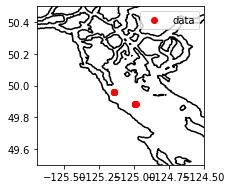

In [9]:
fig, ax = plt.subplots(figsize = (3,3))
viz_tools.set_aspect(ax, coords = 'map')
ax.plot(data2['Lon'], data2['Lat'], 'ro',label='data')
with nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc') as grid:
    viz_tools.plot_coastline(ax, grid, coords = 'map')
ax.set_ylim(49.5, 50.5)
ax.legend()
ax.set_xlim(-125.7, -124.5);

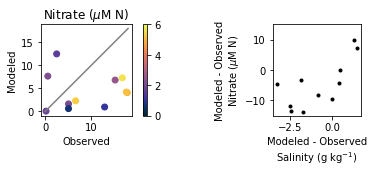

In [48]:
fig,ax=plt.subplots(1,2,figsize=(7,2.5))
p=et.varvarScatter(ax[0],data2,'N','mod_nitrate','Z',vmin=0,vmax=6)
fig.colorbar(p,ax=ax[0])
ax[0].plot((0,18),(0,18),'-',color='gray')
ax[0].set_ylabel('Modeled')
ax[0].set_xlabel('Observed')
ax[0].set_title('Nitrate ($\mu$M N)')
ax[0].set_aspect(1)
ax[1].plot(data2['mod_vosaline']-data2['AbsSal'],data2['mod_nitrate']-data2['N'],'k.')
ax[1].set_ylabel('Modeled - Observed\nNitrate ($\mu$M N)')
ax[1].set_xlabel('Modeled - Observed\nSalinity (g kg$^{-1}$)')
ax[1].set_ylim(-15,15)
ax[1].set_aspect(.18)
plt.tight_layout()
fig.savefig('/data/eolson/MEOPAR/northernEval.pdf',dpi=200)

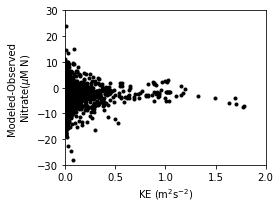

In [59]:
fig,ax=plt.subplots(1,1,figsize=(4,3))
ax.plot(.5*data['mod_vomecrty']*data['mod_vomecrty']+.5*data['mod_vozocrtx']*data['mod_vozocrtx'],
        data['mod_nitrate']-data['N'],'k.')
ax.set_xlim((0,2));
ax.set_ylim((-30,30))
ax.set_xlabel('KE (m$^{2}$s$^{-2}$)')
ax.set_ylabel('Modeled-Observed\nNitrate($\mu$M N)')
plt.tight_layout()
fig.savefig('/data/eolson/MEOPAR/biasKE.pdf',dpi=200)

Text(0, 0.5, 'ModelObserved')

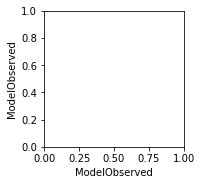

In [12]:
fig,ax=plt.subplots(1,1,figsize=(2.5,2.5))
#ax.plot(data2['mod_vosaline']-data2['AbsSal'],data2['mod_nitrate']-data2['N'],'k.')
ax.set_xlabel('ModelObserved')
ax.set_ylabel('ModelObserved')
#ax.set_xlim(-.5,.5)
#ax.set_ylim(-15,15)

In [13]:
data2.loc[:,['dtUTC','Lat','Lon','Z','N','mod_nitrate','mod_sossheig']]

,dtUTC,Lat,Lon,Z,N,mod_nitrate,mod_sossheig
0,2015-06-06 05:45:04,49.883667,-124.994333,1.784583,0.21,0.081692,1.491054
1,2016-06-04 02:04:08,49.884500,-124.990000,2.181154,0.59,7.675766,1.049719
2,2016-06-19 13:58:13,49.883333,-124.993667,2.082012,5.08,1.644718,0.353714
3,2016-06-19 13:58:13,49.883333,-124.993667,5.353702,6.62,2.318121,0.353714
4,2016-06-19 17:24:28,49.962000,-125.147667,2.577707,15.20,6.824623,-1.993569
5,2016-06-19 17:24:28,49.962000,-125.147667,5.651085,16.76,7.295081,-1.993569
6,2017-06-02 20:52:30,49.881833,-124.994667,1.600000,2.51,12.496552,0.219395
7,2017-06-25 20:14:07,49.962000,-125.147333,1.100000,12.92,0.971559,-2.665349
8,2017-06-25 20:14:07,49.962000,-125.147333,5.000000,17.83,4.103254,-2.665349
9,2017-06-26 01:21:43,49.883167,-124.993500,0.700000,5.08,0.627218,0.864754


### load tidal predictions at Campbell River

In [14]:
from dateutil import tz
def dateParserMeasured2(s):
    """
    converts string in %d-%b-%Y %H:%M:%S format Pacific time to a
    datetime object UTC time.
    """
    PST = tz.tzoffset("PST", -28800)
    # convert the string to a datetime object
    unaware = dt.datetime.strptime(s, "%d-%b-%Y %H:%M:%S ")
    # add in the local time zone (Canada/Pacific)
    aware = unaware.replace(tzinfo=PST)
    # convert to UTC
    return aware.astimezone(tz.tzutc())
def to_dt (date):
    y = date.year
    m = date.month
    d = date.day
    h = date.hour
    mins = 0
    return dt.datetime(y,m,d, h, mins)

In [15]:
filename='/data/eolson/MEOPAR/SalishSeaNowcast/tidal_predictions/Campbell River_tidal_prediction_01-Jan-2015_01-Jan-2020.csv'
#with open(filename) as f:
#    mycsv = list(csv.reader(f))
#    msl = float(mycsv[1][1])
tides = pd.read_csv(filename, skiprows=3, parse_dates=[0], date_parser=dateParserMeasured2)
tides = tides.rename(columns={
           'Time_Local ': 'time',
           ' pred_8 ': 'pred_8',
           ' pred_all ': 'pred_all',
       })
ftimes = list(map(to_dt, tides.time)) 
fpreds = list(tides.pred_all)
   

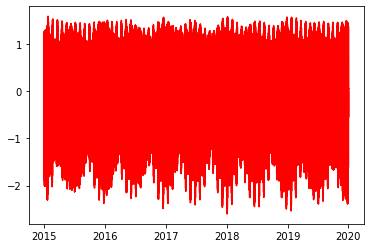

In [16]:
plt.plot(ftimes,fpreds,'r-')

In [17]:
data2['tideCR']=np.nan
tsec=[(ii-dt.datetime(1900,1,1)).total_seconds() for ii in ftimes]

In [18]:
for i, row in data2.iterrows():
    data2.loc[i,['tideCR']]=np.interp((row['dtUTC']-dt.datetime(1900,1,1)).total_seconds(),tsec,fpreds)

Text(0.5, 1.0, 'SSH (m)')

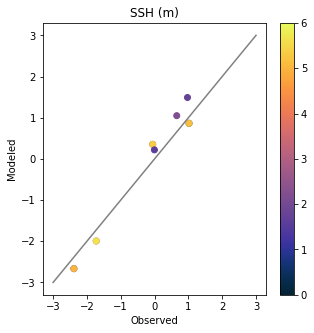

In [19]:
fig,ax=plt.subplots(1,1,figsize=(5,5))
p=et.varvarScatter(ax,data2,'tideCR','mod_sossheig','Z',vmin=0,vmax=6)
fig.colorbar(p)
ax.plot((-3,3),(-3,3),'-',color='gray')
ax.set_ylabel('Modeled')
ax.set_xlabel('Observed')
ax.set_title('SSH (m)')

Text(0, 0.5, 'model - obs NO3')

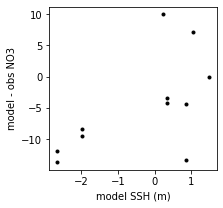

In [20]:
fig,ax=plt.subplots(1,1,figsize=(3,3))
ax.plot(data2['mod_sossheig'],data2['mod_nitrate']-data2['N'],'k.')
ax.set_xlabel('model SSH (m)')
ax.set_ylabel('model - obs NO3')

Text(0, 0.5, 'model - obs NO3')

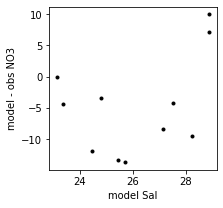

In [21]:
fig,ax=plt.subplots(1,1,figsize=(3,3))
ax.plot(data2['mod_vosaline'],data2['mod_nitrate']-data2['N'],'k.')
ax.set_xlabel('model Sal')
ax.set_ylabel('model - obs NO3')

(-15, 15)

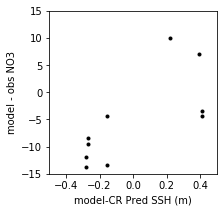

In [22]:
fig,ax=plt.subplots(1,1,figsize=(3,3))
ax.plot(data2['mod_sossheig']-data2['tideCR'],data2['mod_nitrate']-data2['N'],'k.')
ax.set_xlabel('model-CR Pred SSH (m)')
ax.set_ylabel('model - obs NO3')
ax.set_xlim(-.5,.5)
ax.set_ylim(-15,15)

(-15, 15)

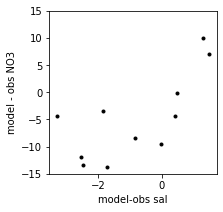

In [23]:
fig,ax=plt.subplots(1,1,figsize=(3,3))
ax.plot(data2['mod_vosaline']-data2['AbsSal'],data2['mod_nitrate']-data2['N'],'k.')
ax.set_xlabel('model-obs sal')
ax.set_ylabel('model - obs NO3')
#ax.set_xlim(-.5,.5)
ax.set_ylim(-15,15)

In [24]:
# find min and max within 12 hrs

In [25]:
data2['dtUTC'][0].date()

datetime.date(2015, 6, 6)

In [26]:
data2['Nmin']=np.nan
data2['Nmax']=np.nan

In [27]:
for i, row in data2.iterrows():
    t0=row['dtUTC']-dt.timedelta(hours=12)
    te=row['dtUTC']+dt.timedelta(hours=12)
    flist=et.index_model_files(t0,te,
                          PATH,'nowcast',flen,'ptrc_T',1)
    tf0=flist.loc[0,['t_0']].values[0]
    tfe=flist.loc[len(flist)-1,['t_n']].values[0]-dt.timedelta(days=1)
    iii0=int((t0-tf0).total_seconds()/3600)
    iiie=int((te-tf0).days*24+24)
    Ntemp=np.empty((int((tfe-tf0).days*24+24),))
    Ntemp.fill(np.nan)
    ti=t0
    # last calc was on T grid in 2d, so only need to recalc k
    k=et._getZInd_bin(row['Z'],boundsFlag=True)
    for iif in range(0,len(flist)):
        fT=nc.Dataset(flist.loc[iif,['paths']].values[0])
        li0=iif*flen*24
        li1=(iif+1)*flen*24
        Ntemp[li0:li1]=fT.variables['nitrate'][:,k,row['j'],row['i']]
    #print(Ntemp)
    data2.loc[i,['Nmin']]=np.min(Ntemp[iii0:iiie])
    data2.loc[i,['Nmax']]=np.max(Ntemp[iii0:iiie])

In [28]:
data2[['dtUTC','Z','Lat','Lon','N','mod_nitrate','Nmin','Nmax','mod_sossheig','tideCR']]

,dtUTC,Z,Lat,Lon,N,mod_nitrate,Nmin,Nmax,mod_sossheig,tideCR
0,2015-06-06 05:45:04,1.784583,49.883667,-124.994333,0.21,0.081692,0.055532,0.650402,1.491054,0.973887
1,2016-06-04 02:04:08,2.181154,49.884500,-124.990000,0.59,7.675766,0.975857,14.539207,1.049719,0.656168
2,2016-06-19 13:58:13,2.082012,49.883333,-124.993667,5.08,1.644718,0.072023,3.953901,0.353714,-0.055620
3,2016-06-19 13:58:13,5.353702,49.883333,-124.993667,6.62,2.318121,0.080359,10.796264,0.353714,-0.055620
4,2016-06-19 17:24:28,2.577707,49.962000,-125.147667,15.20,6.824623,0.159286,20.477089,-1.993569,-1.725387
5,2016-06-19 17:24:28,5.651085,49.962000,-125.147667,16.76,7.295081,4.800701,20.839758,-1.993569,-1.725387
6,2017-06-02 20:52:30,1.600000,49.881833,-124.994667,2.51,12.496552,4.092856,15.303890,0.219395,-0.003969
7,2017-06-25 20:14:07,1.100000,49.962000,-125.147333,12.92,0.971559,0.635081,19.782539,-2.665349,-2.384817
8,2017-06-25 20:14:07,5.000000,49.962000,-125.147333,17.83,4.103254,1.820620,20.715055,-2.665349,-2.384817
9,2017-06-26 01:21:43,0.700000,49.883167,-124.993500,5.08,0.627218,0.157706,3.686208,0.864754,1.019589


In [29]:
fig,ax=plt.subplots(1,1,figsize=(4,3))
p=ax.errorbar(data2['N'],data2['mod_nitrate'],
              yerr=[data2['mod_nitrate']-data2['Nmin'],data2['Nmax']-data2['mod_nitrate']],fmt='none',elinewidth=1,color='k',
             capsize=5)
ax.set_aspect(1)
ax.plot((0,25),(0,25),'-',color='gray')
ax.set_ylabel('Modeled')
ax.set_xlabel('Observed')
p=et.varvarScatter(ax,data2,'N','mod_nitrate','Z',vmin=0,vmax=6)
cb=fig.colorbar(p)
cb.set_label('Depth (m)')
ax.set_title('Nitrate ($\muup$M N)\nWithin Upper 6 m')
ax.set_xlim(0,22)
ax.set_ylim(0,22)
ti=np.linspace(0,20,5);
ax.set_xticks(ti);
ax.set_yticks(ti);

ValueError: 
\muup
^
Unknown symbol: \muup, found '\'  (at char 0), (line:1, col:1)

<Figure size 288x216 with 2 Axes>

In [30]:
fig,ax=plt.subplots(1,1,figsize=(4,3))
p=ax.errorbar(data2['N'],data2['mod_nitrate'],
              yerr=[data2['mod_nitrate']-data2['Nmin'],data2['Nmax']-data2['mod_nitrate']],fmt='k.',elinewidth=1,color='k',
             capsize=5)
ax.set_aspect(1)
ax.plot((0,25),(0,25),'-',color='gray')
ax.set_ylabel('Modeled')
ax.set_xlabel('Observed')
ax.set_title('Nitrate ($\muup$M N)\nWithin Upper 6 m\nDiscovery Passage Plu')
ax.set_xlim(0,22)
ax.set_ylim(0,22)
ti=np.linspace(0,20,5);
ax.set_xticks(ti);
ax.set_yticks(ti);
fig.savefig('/data/eolson/MEOPAR/biomodelevalpaper/response/)

SyntaxError: EOL while scanning string literal (<ipython-input-30-b3473ca45fc0>, line 15)

In [ ]:
s= et.stats(data2['N'],data2['mod_nitrate'])
print(s)

In [ ]:
print('count is: ',s[0])
print('bias is:', s[3])